# Softmax - MNIST

El algoritmo _softmax_ se aplica cuando existen más de dos clases por clasificar. En este notebook se desarrolla la implementación de Softmax para clasificación multiclase mediante las librerías de Sklearn 

## Cargamos las Librerías

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

RANDOM_STATE = 17

## Cargamos el Dataset

In [60]:
# Cargamos los datos
X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [61]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


In [62]:
clases = np.unique(y)
print(clases)

[0 1 2 3 4 5 6 7 8 9]


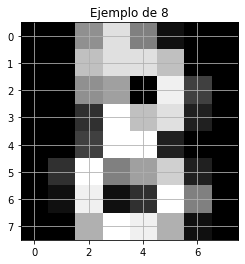

In [63]:
# Cargamos una muestra

plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')
plt.show()

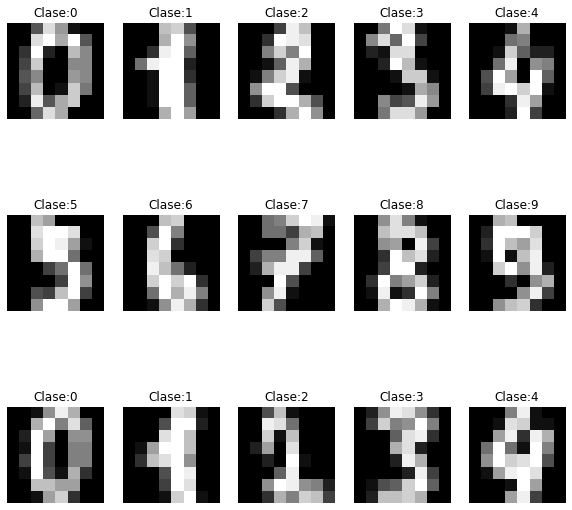

In [64]:
# Graficamos varias muestras

fig = plt.figure(figsize=(10, 10))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X[i].reshape(8, 8), cmap=plt.get_cmap('gray'))
    ax.set_title('Clase:{y}'.format(y=y[i]))
    plt.axis('off')
plt.show()

In [65]:
# Split del dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [66]:
X_train.shape

(1437, 64)

In [67]:
y_train.shape

(1437,)

In [68]:
y_test.shape

(360,)

# Clasificación
Para efectuar la clasificación mediante sklearn, se especifican: 
- Tipo de algoritmo de optimización: se aplica "newton-cg" como método de minimización cuadrática.
- La opción multi_class='multinomial' es la que se emplea en problemas binarios.

In [69]:
#Creación del objeto de clasificación. 
softmax = LogisticRegression(multi_class='multinomial',solver='newton-cg') 
softmax.fit(X_train, y_train)
prediction = softmax.predict(X_test)

# Métricas
### Función necesaria para graficar la matriz de confusión

In [70]:
def plotConfusionMatrix(conf_mtx, c):
    plt.figure(figsize=(15,15))
    plt.imshow(conf_mtx, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    tick_marks = np.arange(c)
    plt.xticks(tick_marks, np.arange(c) , rotation=45)
    plt.yticks(tick_marks, np.arange(c))

    fmt = '.2f'
    thresh = conf_mtx.max() / 2.

    for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
        plt.text(j, i, format(conf_mtx[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if conf_mtx[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

### Accuracy metric

In [71]:
accuracy = accuracy_score(y_test, prediction)
accuracy

0.9638888888888889

### Confusion matrix

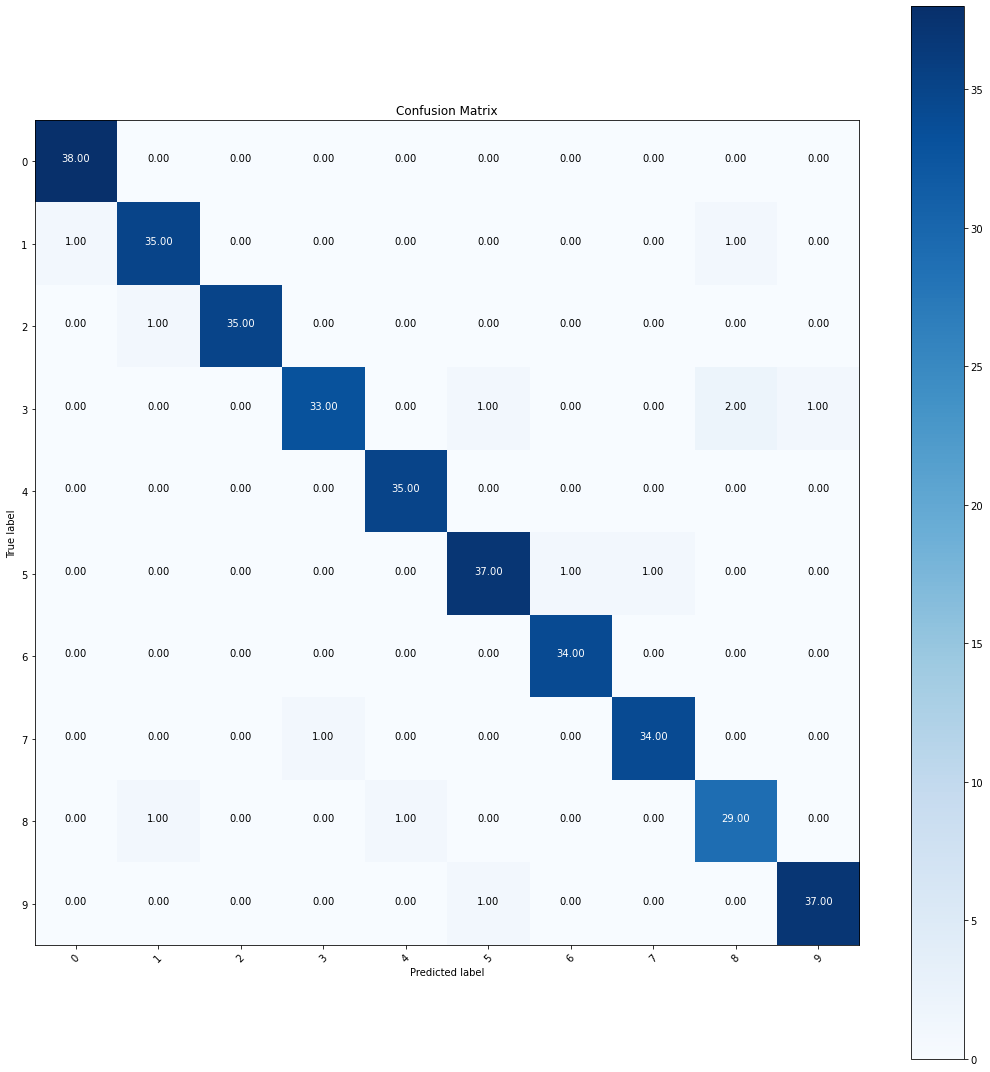

In [72]:
conf_mtx = confusion_matrix(y_test, prediction)
plotConfusionMatrix(conf_mtx, 10)


# Reconstrucción

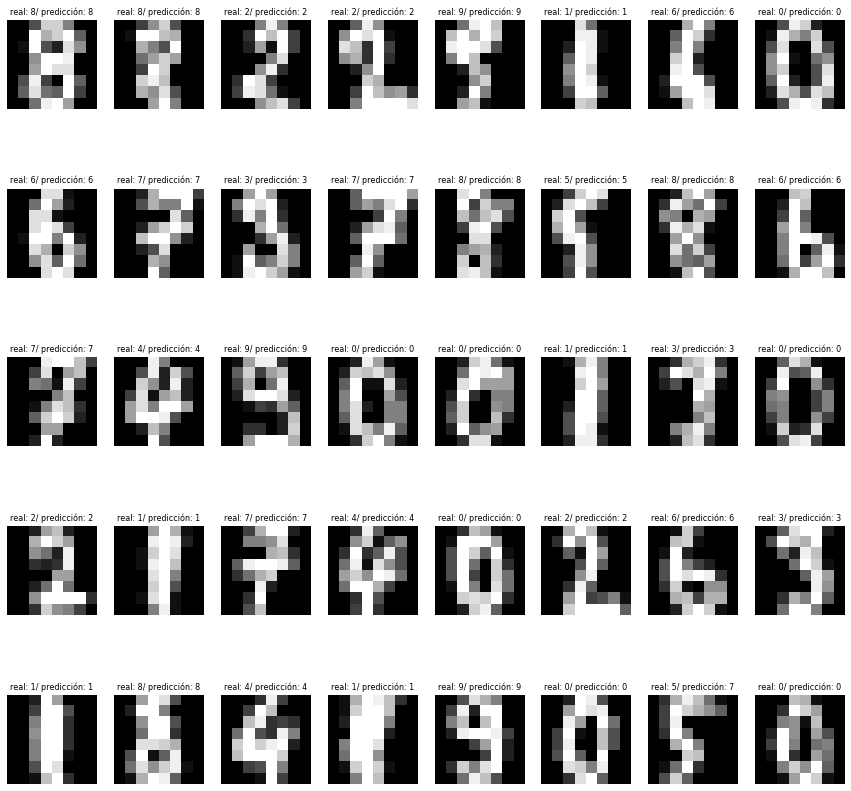

In [73]:
fig = plt.figure(figsize=(15,15))

for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.get_cmap('gray'))    
    ax.set_title('real: {y}/ predicción: {y_hat}'.format(y=y_test[i], y_hat=prediction[i]), fontsize=8)
    plt.axis('off')